In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow import keras
%matplotlib inline

In [3]:
df = pd.read_csv('The-2021-Flores-Sea-earthquake-catalog.csv', names = ['Date','Time','Latitude','Longitude','Depth','Magnitude'])
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,12/14/2021,03:20:23.0,-7.555067,122.248034,12.193,7.3
1,12/14/2021,03:23:30.0,-7.520367,122.276527,9.908,5.7
2,12/14/2021,03:25:31.0,-7.661919,122.291383,12.201,5.8
3,12/14/2021,03:38:14.0,-7.613724,121.543867,11.237,5.5
4,12/14/2021,03:41:56.0,-7.781743,122.403823,9.906,5.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1403 non-null   object 
 1   Time       1403 non-null   object 
 2   Latitude   1403 non-null   float64
 3   Longitude  1403 non-null   float64
 4   Depth      1403 non-null   float64
 5   Magnitude  1403 non-null   float64
dtypes: float64(4), object(2)
memory usage: 65.9+ KB


In [5]:
df = df[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Latitude,Longitude,Depth,Magnitude
0,-7.555067,122.248034,12.193,7.3
1,-7.520367,122.276527,9.908,5.7
2,-7.661919,122.291383,12.201,5.8
3,-7.613724,121.543867,11.237,5.5
4,-7.781743,122.403823,9.906,5.5


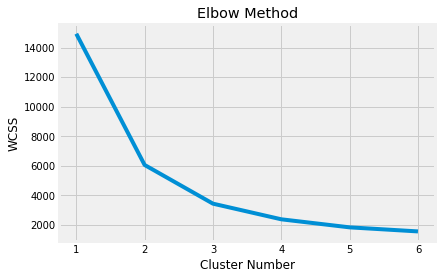

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [7]:
#mengaktifkan K-Means dan melakukan fitting
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Menampilkan nilai centroid yang di generate oleh algoritma
print(kmeans.cluster_centers_)

[[ -7.53370913 121.89721349  11.37294419   2.95193798]
 [ -7.56044329 121.96175543  15.99200382   2.90725191]
 [ -7.55657609 121.92148593   7.86057863   2.85141129]]


In [8]:
#Menampilkan label data point
print(len(kmeans.labels_))
print(kmeans.labels_)

1403
[0 0 0 ... 2 0 2]


In [9]:
X = kmeans.fit_predict(df)
dflabel = pd.DataFrame(X,columns=['kluster'])
dflabel

,kluster
0,0
1,0
2,0
3,0
4,0
...,...
1398,0
1399,0
1400,1
1401,0


In [10]:
Y = pd.concat([df,dflabel], axis=1)

In [11]:
Y.shape

(1403, 5)

In [12]:
Y

,Latitude,Longitude,Depth,Magnitude,kluster
0,-7.555067,122.248034,12.193,7.3,0
1,-7.520367,122.276527,9.908,5.7,0
2,-7.661919,122.291383,12.201,5.8,0
3,-7.613724,121.543867,11.237,5.5,0
4,-7.781743,122.403823,9.906,5.5,0
...,...,...,...,...,...
1398,-7.942976,122.434714,10.945,2.6,0
1399,-7.522410,121.642042,11.715,2.6,0
1400,-8.067844,122.461982,5.669,2.2,1
1401,-7.765531,122.515053,12.037,2.5,0


In [13]:
Y.iloc[300]

Latitude      -7.491503
Longitude    122.096676
Depth         12.212000
Magnitude      2.700000
kluster        0.000000
Name: 300, dtype: float64

In [14]:
Y.to_csv("hasil_kluster_data_lanjutan.csv")

In [15]:
X=Y.iloc[:,0:4].values
print(X)

[[ -7.555067 122.248034  12.193      7.3     ]
 [ -7.520367 122.276527   9.908      5.7     ]
 [ -7.661919 122.291383  12.201      5.8     ]
 ...
 [ -8.067844 122.461982   5.669      2.2     ]
 [ -7.765531 122.515053  12.037      2.5     ]
 [ -7.546941 121.670558   8.745      2.      ]]


In [16]:
y=Y.iloc[:,-1].values
print(y)

[0 0 0 ... 1 0 1]


In [17]:
print(X[20:100])
print(y[20:100])

[[ -7.627983 121.921061  11.805      3.8     ]
 [ -7.647825 122.348401  11.811      3.6     ]
 [ -7.486285 121.594055  11.33       4.      ]
 [ -7.490711 121.617082  13.815      4.2     ]
 [ -7.205391 122.232964  10.63       3.5     ]
 [ -7.369999 121.22835   14.08       3.4     ]
 [ -7.579879 122.421495   9.773      3.6     ]
 [ -7.562879 122.321608  10.028      3.2     ]
 [ -7.381121 121.739144   7.831      3.4     ]
 [ -7.542362 121.780361  12.964      3.7     ]
 [ -7.849035 122.466928  12.347      3.5     ]
 [ -7.644486 122.434626  15.185      3.7     ]
 [ -7.814832 122.385087  18.113      3.3     ]
 [ -7.491662 122.212503   8.67       3.4     ]
 [ -7.16554  122.207811   7.405      3.4     ]
 [ -7.553416 122.367062  18.617      4.1     ]
 [ -7.537931 122.329331  14.523      4.4     ]
 [ -7.507145 121.770833  10.793      5.      ]
 [ -7.615661 122.38653   15.564      3.7     ]
 [ -7.410531 122.309274  10.551      3.6     ]
 [ -7.351871 121.250347  12.088      4.3     ]
 [ -7.663688 

In [18]:
print(X[20:100])
print(y[20:100])

[[ -7.627983 121.921061  11.805      3.8     ]
 [ -7.647825 122.348401  11.811      3.6     ]
 [ -7.486285 121.594055  11.33       4.      ]
 [ -7.490711 121.617082  13.815      4.2     ]
 [ -7.205391 122.232964  10.63       3.5     ]
 [ -7.369999 121.22835   14.08       3.4     ]
 [ -7.579879 122.421495   9.773      3.6     ]
 [ -7.562879 122.321608  10.028      3.2     ]
 [ -7.381121 121.739144   7.831      3.4     ]
 [ -7.542362 121.780361  12.964      3.7     ]
 [ -7.849035 122.466928  12.347      3.5     ]
 [ -7.644486 122.434626  15.185      3.7     ]
 [ -7.814832 122.385087  18.113      3.3     ]
 [ -7.491662 122.212503   8.67       3.4     ]
 [ -7.16554  122.207811   7.405      3.4     ]
 [ -7.553416 122.367062  18.617      4.1     ]
 [ -7.537931 122.329331  14.523      4.4     ]
 [ -7.507145 121.770833  10.793      5.      ]
 [ -7.615661 122.38653   15.564      3.7     ]
 [ -7.410531 122.309274  10.551      3.6     ]
 [ -7.351871 121.250347  12.088      4.3     ]
 [ -7.663688 

In [19]:
print(X.shape)
print(y.shape)

(1403, 4)
(1403,)


In [20]:
X

array([[ -7.555067, 122.248034,  12.193   ,   7.3     ],
       [ -7.520367, 122.276527,   9.908   ,   5.7     ],
       [ -7.661919, 122.291383,  12.201   ,   5.8     ],
       ...,
       [ -8.067844, 122.461982,   5.669   ,   2.2     ],
       [ -7.765531, 122.515053,  12.037   ,   2.5     ],
       [ -7.546941, 121.670558,   8.745   ,   2.      ]])

In [21]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [23]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  982
Banyak data uji setelah dilakukan Train-Validation Split:  421


# 1. K-Fold Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 5)
print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 5-Fold Cross Validation: ", scores.mean())

Akurasi model SVM untuk tiap fold:  [0.98576512 0.99288256 0.99644128 1.         0.99642857]
Akurasi model SVM dengan 5-Fold Cross Validation:  0.9943035078800204


# 2. Metode Klasifikasi

# 2.1Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", score)

Akurasi dengan menggunakan Logistic Regression:  0.995249406175772


/Users/adijufriansah/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2.2 Support Vector Machine

In [26]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01
)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine: ", score)

Akurasi dengan menggunakan Support Vector Machine:  0.9833729216152018


2.2.1 Hyperparameter SVM

In [27]:
# SVM dengan kernel Linear, nilai parameter C dapat diubah juga.
svmLinear = SVC(
  kernel = 'linear',
  C = 1
)

svmLinear.fit(X_train, y_train)
y_pred = svmLinear.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Linear Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Linear Kernel:  0.9928741092636579


In [28]:
# SVM dengan kernel polynomial, nilai parameter C, degree, dan gamma dapat diubah juga.
svmPoly = SVC(
  kernel = 'poly',
  C = 1,
  gamma = 0.01,
  degree = 2
)

svmPoly.fit(X_train, y_train)
y_pred = svmPoly.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel:  0.9928741092636579


In [29]:
# SVM dengan kernel RBF, nilai parameter C dan gamma dapat diubah juga.
svmRBF = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01,
)

svmRBF.fit(X_train, y_train)
y_pred = svmRBF.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine RBF Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine RBF Kernel:  0.9833729216152018


# 2.3 Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(
  max_depth = None,
  min_samples_split = 2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

Akurasi dengan menggunakan Decision Tree:  1.0


2.3.1 Hyperparameter Decision Tree

In [31]:
# Decision Tree dengan maximal kedalaman adalah 1 dan minimal jumlah sampel untuk dibentuk leaf baru adalah 2
dt = DecisionTreeClassifier(
  max_depth = 1,
  min_samples_split = 2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

Akurasi dengan menggunakan Decision Tree:  0.8004750593824228


# 2.4 Naive Bayes

In [32]:
from sklearn import naive_bayes
from sklearn import metrics

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Naive Bayes: ", score)

Akurasi dengan menggunakan Naive Bayes:  0.46080760095011875


# 2.5 K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

Akurasi dengan menggunakan Nearest Neighbor:  0.9928741092636579
